***

# Libraries required for the Project

In [1]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from collections import Counter
from nltk.corpus import stopwords
from sklearn.svm import SVC
import nltk
plt.style.use("ggplot")
nltk.download('names')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


True

***

## Data Reading

In [2]:
data=fetch_20newsgroups()

In [3]:
#Getting the keys from given dataset
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
#Data Description
print(data["DESCR"])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [5]:
data["target"]

array([7, 4, 4, ..., 3, 1, 8])

In [6]:
#type of target categories 
data["target_names"]

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
#Actual text data
data["data"]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

***

# So, the basic workflow of our project will go like

# Data reading-->Data cleaning(In this case, text cleaning using NLP techniques)-->Data Transformation(To model understandable type)--> Model Training and Testing

## Dividing our dataset into training and testing...

## We will be working with only 3 categories to predict...

In [8]:
#Our target variables
target=['sci.electronics','rec.sport.hockey','talk.politics.guns']
#Training data
df_train= fetch_20newsgroups(subset='train', categories=target, random_state=101)
#Testing data
df_test= fetch_20newsgroups(subset='test', categories=target, random_state=101)

In [9]:
df_train

{'data': ['From: chuq@apple.com (Chuq Von Rospach)\nSubject: Re: SHARKS REVIEW Part 5: Left Wings\nOrganization: Go Sharks, Go Giants, Inc.\nLines: 113\nNNTP-Posting-Host: apple.com\n\nnlu@Xenon.Stanford.EDU (Nelson Lu) writes:\n\n>#8\tLARRY DEPALMA\t\tSeason:\t3rd\n>Acquired:\t\'91-92, free agent from Minnesota\n>Grade:\t\tI (C-/D+)\n\n>No netter/fan watching the Sharks, including me, knows where DePalma was at\n>the end of the season; the Sharks appeared to still have his rights, but he\n>wasn\'t in San Jose, he wasn\'t in Kansas City, and his name hasn\'t appeared on\n>the waiver wire.\n\nSorry, Nelson, but you forgot to ask me. If you check the THN stats for\nKansas City, you\'ll find that Larry has been playing for the games, having\nplayed in 8 games in the period covered in the stats between 3/26 and the\n4/16 issue (1-3-4 with 13 PIM). Not exactly invisible.\n\n>He then was sent down to\n>Kansas City, walked out from there, and was suspended and later reinstated\n>when it was r

In [10]:
df_train["data"]

['From: chuq@apple.com (Chuq Von Rospach)\nSubject: Re: SHARKS REVIEW Part 5: Left Wings\nOrganization: Go Sharks, Go Giants, Inc.\nLines: 113\nNNTP-Posting-Host: apple.com\n\nnlu@Xenon.Stanford.EDU (Nelson Lu) writes:\n\n>#8\tLARRY DEPALMA\t\tSeason:\t3rd\n>Acquired:\t\'91-92, free agent from Minnesota\n>Grade:\t\tI (C-/D+)\n\n>No netter/fan watching the Sharks, including me, knows where DePalma was at\n>the end of the season; the Sharks appeared to still have his rights, but he\n>wasn\'t in San Jose, he wasn\'t in Kansas City, and his name hasn\'t appeared on\n>the waiver wire.\n\nSorry, Nelson, but you forgot to ask me. If you check the THN stats for\nKansas City, you\'ll find that Larry has been playing for the games, having\nplayed in 8 games in the period covered in the stats between 3/26 and the\n4/16 issue (1-3-4 with 13 PIM). Not exactly invisible.\n\n>He then was sent down to\n>Kansas City, walked out from there, and was suspended and later reinstated\n>when it was revealed t

***

## So, now we will be cleaning our datasets by removing unwanted characters like punctuations, stopwords, and lemmatizing different words

In [11]:
#We will be creating a function to clean our textual data

In [12]:
# NLTK- natural language toolkit
stop_words= stopwords.words('english')# stopwords- a, the, an ,for, is...etc
#all_names
all_names=set(names.words())
# preprocessing
#- lower case
#- root form run, running- run (lemmatization)

lemma= WordNetLemmatizer()
def is_letter_only(word):
    return word.isalpha()

In [13]:
#Definign a fucntion to clean our text data for both training and testing dataset...by lemmatizing and removing stopwords...
def clean_text(doc):
    doc_clean=[]
    for i in doc:
        i=i.lower()
        i_clean=' '.join(lemma.lemmatize(word) for word in i.split() if is_letter_only(word) and word not in all_names and word not in stop_words)
        doc_clean.append(i_clean)
    return doc_clean

In [14]:
#We will be cleaning our data
#clean train data
df_train_clean= clean_text(df_train.data)
df_train_label= df_train.target

#clean test data
df_test_clean= clean_text(df_test.data)
df_test_label= df_test.target

In [15]:
#Counting our target values
print("Training label",Counter(df_train_label))
print("Testing label",Counter(df_test_label))

Training label Counter({0: 600, 1: 591, 2: 546})
Testing label Counter({0: 399, 1: 393, 2: 364})


In [16]:
#Now our text data is clean and ready to be converted to numeric form by using tf-idf vectorizer

In [17]:
tfidf= TfidfVectorizer(stop_words='english') #basically stopping all the english basic words
df_train_conv= tfidf.fit_transform(df_train_clean)
df_test_conv= tfidf.transform(df_test_clean)

***

## Now our data is clean and ready to perform predictive analysis using SVC

The accuracy of binary classification is : 97.32%
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       399
           1       0.94      1.00      0.97       393
           2       0.98      0.96      0.97       364

    accuracy                           0.97      1156
   macro avg       0.97      0.97      0.97      1156
weighted avg       0.97      0.97      0.97      1156

[[383  10   6]
 [  0 393   0]
 [  2  13 349]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


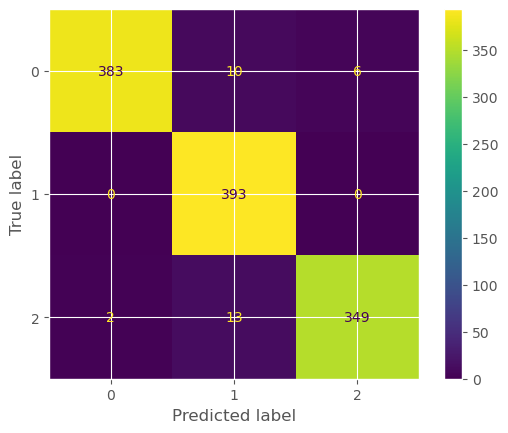

In [18]:
#Our SVC model
model= SVC() #default model
model.fit(df_train_conv, df_train_label) #model fitting with train data
acc= model.score(df_test_conv,df_test_label)
print("The accuracy of binary classification is : {}%".format(round(acc*100,2))) #Model accuracy score

#Model predictions
y_pred=model.predict(df_test_conv)

#Model Evaluation
print(classification_report(df_test_label, y_pred))
print(confusion_matrix(df_test_label, y_pred))
plot_confusion_matrix(model,df_test_conv,df_test_label)

## So, Our model performed with an overall accuracy of 97.3%..Similarly, We can peform with multi-class as well...

***